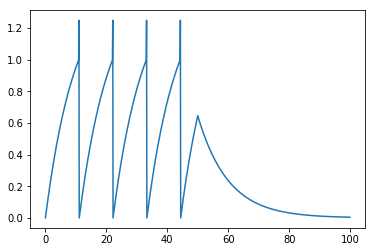

In [87]:
%matplotlib inline
import matplotlib.pyplot as p
import numpy as np
import math as m
#define constants
dt        = 0.1 # change in time between voltage calculations
maxT      = 100 #how long the experiment is
time      = np.zeros(int(maxT/dt)) # array of all timeSteps for graphing
cap       = 10 #(in microFarads) Capacitor!
res       = 1 #kOhm Resistor!
thresh    = 1 # at what voltage we should spike
spikeDisplay= 1.25; # arbitrary value used for "pasting on" a spike. Not needed, just nice for display.
tau       = res * (cap) # Time constant, RC circuit
voltage   = np.zeros(int(maxT/dt + 1)) # array of all calculated voltages primarily for graphing
curMag    = 1.5 #amps bb --> how much current should we inject when injecting current
injCurrent = [0, int((maxT/dt)/2)];# [0 ,500] the time we inject current to and from 

def newVal(ov,dvdt,dt): #New value for voltage after one timestep (0.1seconds) note dvdt*dt = dv therefore old Voltage + change in voltage = currentVoltage
    return(ov + dvdt*dt) # idk google this -> https://files.meetup.com/469457/spiking-neurons.pdf

def dvdt(tau,res,v,i): # returns the change in voltage divided by the change in time 
    # after solving a first order differential equation this will spit out something in the form of v(t) = ce^-(t/(res*cap))
    # the t is the time constant (tau) and the constant to get this to just be c/e (c is a constant) is res*cap as res*cap / res*cap = 1
    # tau means the time constant to charge about 0.6321% to its final val from any other val (ie 0 -> 0.6321V will take res*cap seconds if end goal is 1V)
    # therefore the change in voltage with respect to time is given with formula below (real derivation just google online its a parallel RC circuit)
    return((-v +i*res)/tau) # see link above
    # Ohms law v=ir for this is a voltage plus a voltage and tau is in seconds so voltage / seconds is correct units
for j in range(0,int(maxT/dt)):
    # this decides whether we should inject current or not...
    if (injCurrent[0] < j <= injCurrent[1]): # is j between time bounds to inject current? (0 to 500) ( 0< j <= 500)
        #what do I do if time is in the bounds when current should be injected?
        curCur = curMag # curCur = current injected at time step j
       
    else:
        curCur = 0
    # end current injection logic
    
    #print(dvdt(tau, res, voltage[j-1], curCur))
    # to get next voltage we will need current voltage, the change in voltage over time, and the time step
    # tempV is next voltage
    tempV = newVal(voltage[j-1], dvdt(tau, res, voltage[j-1], curCur), dt);# how do I figure out the voltage at the next time step
    if voltage[j-1] == spikeDisplay: 
        tempV = 0;#what should the voltage be if I just spiked? Why?
    elif tempV > thresh:
        tempV = spikeDisplay; # ready to spike
        
    voltage[j] = tempV;
    time[j]=(j*dt);
    
    
p.plot(time,voltage[0:-1]);#again, what is the '-1' doing?
p.show()

When a real neuron has a constant current injected, it results in "imprecise spike trains" which are less accurate than when the currents injected mimic normal synaptic activity. This tells us that the IandF model may be less accurate than it appears when it comes to modeling brain activity, as real neurons do appear not react this way to constant currents. However, I believe that this alone does not make the model "bad" as it is still (if nothing else) a very valuable teaching tool and it seems to have been integral to the progress made in understanding the brain. On the other hand, it is, of course, limited in its usefulness if it is less accurate than other models, and perhaps this should be pointed out to students when it is taught. It may be that when IandF models are being used or taught there should be more discussion surrounding the nature of the electrical currents they are reacting to so that this is not overlooked or misunderstood.